# Mini Projeto: Detecção de Grafites Urbanos — Parte 2
## Morfologia Matemática para Refinamento das Bordas

Nesta etapa, vamos aplicar operações de **morfologia matemática** sobre as imagens de bordas detectadas na Parte 1, com o objetivo de refinar ainda mais os contornos dos grafites.


## O que foi feito na Parte 1?

- Pré-processamento das imagens urbanas
- Aplicação de filtros (gaussiano, mediana)
- Conversão para escala de cinza
- Detecção de bordas (Canny, Sobel)
- Salvamento das imagens processadas na pasta `data/processed/`


## O que é Morfologia Matemática?

Morfolologia matemática é um conjunto de operações para processar estruturas em imagens binárias ou em tons de cinza. Permite:
- Fechar pequenas falhas (Fechamento/Closing)
- Remover ruídos e detalhes finos (Abertura/Opening)

As principais operações são:
- **Abertura (Opening):** Erosão seguida de dilatação. Remove ruídos e pequenos objetos.
- **Fechamento (Closing):** Dilatação seguida de erosão. Preenche falhas e une regiões desconectadas.


Listando e Carregando as Imagens Processadas

In [1]:
# Pasta de entrada (imagens processadas na parte 1)
input_folder = '../data/processed/'
# Pasta de saída para morfologia
output_folder = '../data/morphology/'

import os
import cv2

# Cria a pasta de saída, se não existir
os.makedirs(output_folder, exist_ok=True)

# Lista de arquivos de imagem (jpg, png)
image_files = [f for f in os.listdir(input_folder)
               if f.lower().endswith(('.jpg', '.png'))]

print(f'Quantidade de imagens encontradas em {input_folder}:', len(image_files))
print('Exemplo de nomes de arquivos:', image_files[:5])


Quantidade de imagens encontradas em ../data/processed/: 985
Exemplo de nomes de arquivos: ['canny_0.jpg', 'canny_1.jpg', 'canny_10.jpg', 'canny_100.jpg', 'canny_101.jpg']


Aplicando Operações Morfológicas (Abertura e Fechamento)

In [2]:
import numpy as np

# Definindo kernel morfológico 3x3 (pode testar outros tamanhos)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Dicionários para armazenar os resultados
morph_opening = {}
morph_closing = {}

for img_name in image_files:
    img_path = os.path.join(input_folder, img_name)
    # Lê em tons de cinza
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print('Não foi possível ler:', img_path)
        continue

    # Aplicando Abertura (Opening)
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    morph_opening[img_name] = opening

    # Aplicando Fechamento (Closing)
    closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    morph_closing[img_name] = closing


Comparando Visualmente as Operações

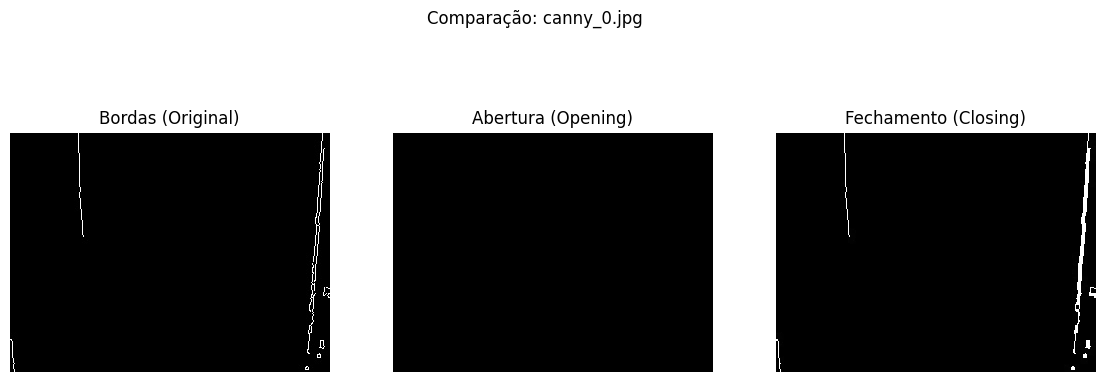

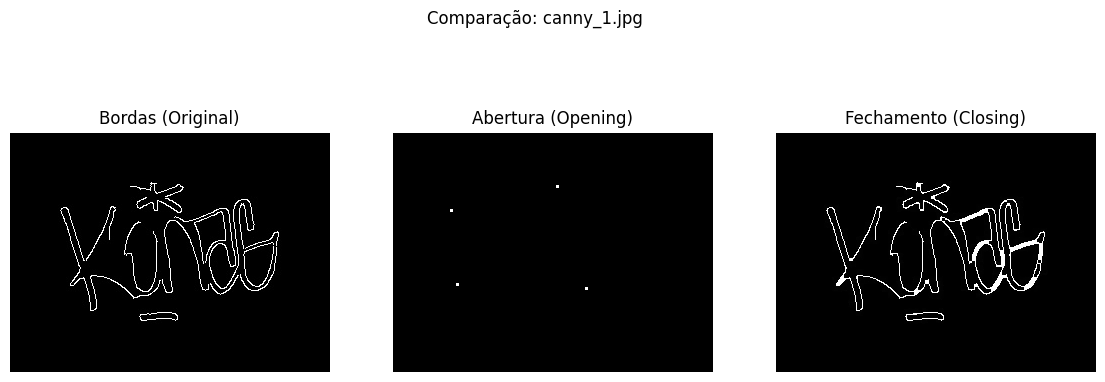

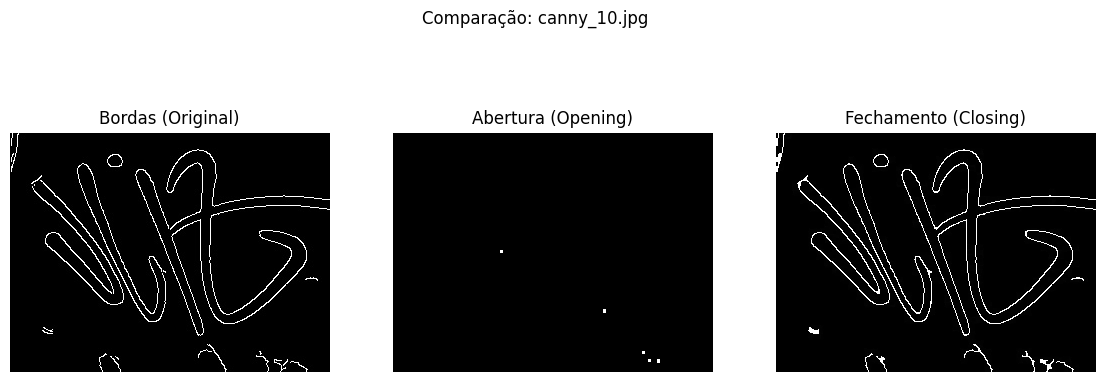

In [3]:
import matplotlib.pyplot as plt

# Exemplo de comparação para os primeiros 3 arquivos
for i, img_name in enumerate(image_files[:3]):
    img_original = cv2.imread(os.path.join(input_folder, img_name), cv2.IMREAD_GRAYSCALE)
    opening = morph_opening[img_name]
    closing = morph_closing[img_name]

    fig, axes = plt.subplots(1, 3, figsize=(14, 5))
    axes[0].imshow(img_original, cmap='gray')
    axes[0].set_title('Bordas (Original)')
    axes[1].imshow(opening, cmap='gray')
    axes[1].set_title('Abertura (Opening)')
    axes[2].imshow(closing, cmap='gray')
    axes[2].set_title('Fechamento (Closing)')
    for ax in axes:
        ax.axis('off')
    plt.suptitle(f'Comparação: {img_name}')
    plt.show()


## Salvando as imagens finais após Morfologia

Após análise visual, **o Fechamento (Closing)** foi escolhido como a melhor operação para refinar os contornos dos grafites. Isso porque ele une falhas e deixa as bordas mais contínuas.

Abaixo, salvamos todas as imagens de fechamento na pasta `data/morphology/`.


In [4]:
# Salvar imagens após fechamento (closing)
for img_name, img_closing in morph_closing.items():
    out_path = os.path.join(output_folder, img_name)
    cv2.imwrite(out_path, img_closing)


## Discussão dos Resultados

### 1. Qual operação ficou melhor?  
Após comparar visualmente as operações, **o Fechamento (Closing)** se mostrou mais eficiente para unir contornos e preencher pequenas falhas nos grafites, deixando a assinatura mais contínua. Abertura removeu ruídos, mas também partes finas do grafite.

### 2. A detecção de bordas da Parte 1 influencia o resultado da morfologia?
Sim. Se a detecção de bordas da etapa anterior for eficiente (com os parâmetros e filtros adequados), as operações de morfologia conseguem realçar ainda mais o grafite. Caso as bordas estejam muito quebradas ou ruidosas, a morfologia não consegue “consertar” tudo, afetando o resultado final.

---

**Observação:**  
- Todas as imagens processadas na Parte 1 foram utilizadas.
- O código foi testado para múltiplos tipos de arquivos (canny, sobel, median, etc).
- Os outputs estão em `data/morphology/`, prontos para a próxima etapa.
